# Méthodes d'interpolation

Dans ce devoir, nous allons comparer la méthode d'interpolation par les polynômes de Lagrange avec différents krigeages pour un jeu de données particulier.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
colors = mpl.cm.rainbow(np.linspace(0, 1, 1000))

def color_gen():
    k = np.random.randint(colors.shape[0], size=1)[0]
    return colors[k,:]

**Question**

> Générez un jeu de données de points proches du graphe de la courbe $x\mapsto e^{-x^2}$. On notera $X$ leurs abscisses et $Y$ leurs ordonnées. Vous prendrez $N$ points avec $N$ pas trop grand (par exemple 20 entre $-5$ et $5$).

In [4]:
def getXY(n):
    X = np.linspace(-5,5,n)
    Y = np.zeros(n)
    for i,a in enumerate(X):
        Y[i] = np.exp(-a**2) + np.random.uniform(-0.05,0.05)
    return X,Y

In [5]:
X,Y = getXY(20)

Text(0.5, 1.0, 'Nuage de points')

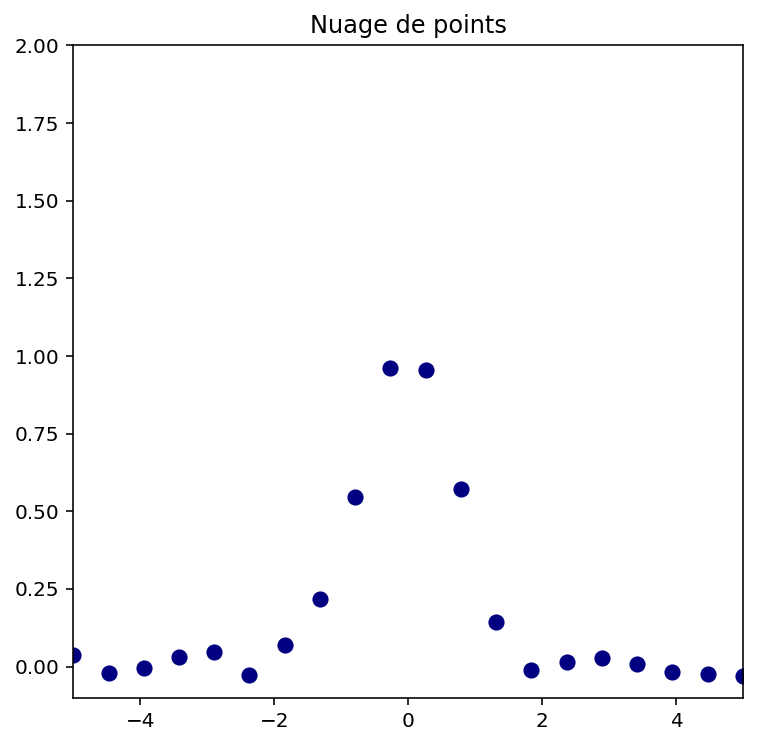

In [6]:
a, b, c, d = -5, 5, -0.1, 2
n = 6*30 +1#6 * X + 1 avec X entier
x = np.linspace(a, b, n)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, Y, s=50, color='navy')
ax.set_xlim(a, b)
ax.set_ylim(c, d)
ax.set_title('Nuage de points')

## Les polynômes interpolateurs de Lagrange

La technique d'interpolation par des polynômes interpolateurs de Lagrange repose sur le théorème suivant.

> **Théorème (Polynôme interpolateur de Lagrange)**<br>
> Soient $(X_1,\ldots,X_N)$ et $(Y_1,\ldots Y_N)$ tels que $X_i\neq X_j$ si $i\neq j$.<br>
  Il existe un unique polynôme $P\in\mathbb{R}_{N-1}[X]$ tel que $P(X_i)=Y_i$ pour tout $1\leq i\leq N$.
  
De nombreuses méthodes existent pour déterminer le polynôme interpolateur de Lagrange et surtout l'évaluer en un grand nombre de points (pour le tracer par exemple). Nous choisissons ici la plus simple et la moins efficace (car elle est utilisée dans la méthode de krigeage plus loin) mais elle suffit ici puisque nous montrons assez vite qu'elle ne permet pas de résoudre notre problème.

Ainsi, nous définissons $V$ la matrice de Vandermonde associé au vecteur $(X_1,\ldots,X_N)$
$$
V = \begin{pmatrix}
1&X_1&\ldots&X_1^{N-1}\\
\vdots&\vdots&\vdots\\
1&X_N&\ldots&X_N^{N-1}
\end{pmatrix}.
$$
Le polynôme interpolateur de Lagrange associé aux points $X$ et $Y$ s'écrit alors
$$ P(X) = \sum_{i=0}^{N-1} \alpha_i X^i $$
où le vecteur $\alpha=(\alpha_0,\ldots,\alpha_{N-1})$ est solution de $V\alpha=Y$.

**Question**

> * Proposez une fonction `interp_Lagrange` qui prend en arguments 3 `ndarray` contenant les points d'interpolation $(X_1,\ldots,X_N)$, $(Y_1,\ldots,Y_N)$ et les points $(x_1,\ldots,x_n)$ où le polynôme $P$ est évalué et qui retourne un `ndarray` $y$ tel que $y_i = P(x_i)$ pour $1\leq i\leq n$.
> * Testez cette fonction en prenant pour points d'interpolation les points $X$ et $Y$ donnés en début de notebook.
> * Expliquez pourquoi l'interpolation par un polynôme ne permet pas d'avoir une bonne représentation des données.

In [7]:
def interp_Lagrange(X,Y,x):
    n = len(X)
    V = np.ones((n,n))
    for i in np.arange(n):
        V[:,i] = X**i
    
    alpha = np.linalg.solve(V,Y)
    
    y = np.zeros(x.shape)
    print(x.shape)
    print(alpha)
    for a in alpha[::-1]:
        y = y*x + a
    
    return y

(181,)
[ 1.02279265e+00 -2.76025889e-02 -9.66434981e-01  1.87220686e-01
  4.13658181e-01 -2.57478732e-01 -1.00439744e-01  1.32844476e-01
  1.44114906e-02 -3.43008059e-02 -1.20056433e-03  4.97800694e-03
  5.41124935e-05 -4.22891882e-04 -1.02927786e-06  2.07709343e-05
 -4.00589454e-09 -5.43828907e-07  2.91282864e-10  5.85027939e-09]
(300,)
[ 9.92439817e-01 -1.02147541e-03 -8.47909638e-01  1.67938395e-02
  3.47696656e-01 -6.19517417e-03 -9.49664520e-02 -7.57626427e-03
  1.88092294e-02  4.35127818e-03 -2.54045510e-03 -9.04780684e-04
  2.16605463e-04  9.45190487e-05 -1.09168794e-05 -5.29410670e-06
  2.94073142e-07  1.51408301e-07 -3.24386128e-09 -1.73237538e-09]


Text(0.5, 1.0, 'Nuage de points')

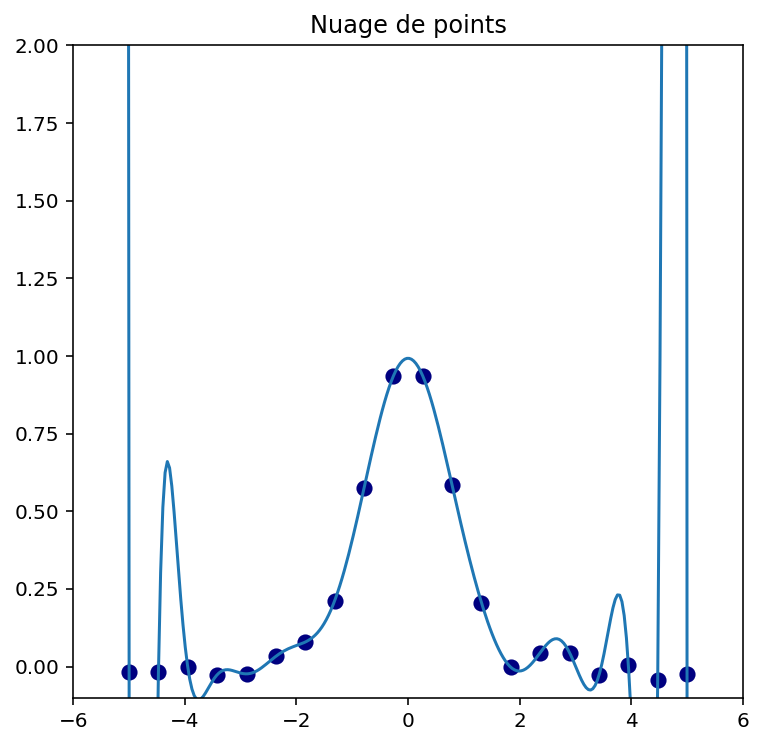

In [8]:
y = interp_Lagrange(X,Y, x)

a, b, c, d = -6, 6, -0.1, 2
n = 300
x = np.linspace(a, b, n)
X,Y = getXY(20)

y = interp_Lagrange(X,Y,x)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, Y, s=50, color='navy')
ax.plot(x, y)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
ax.set_title('Nuage de points')

Sur les bords, on remarque que les polynomes tendent vers plus l'infini, notamment pour les polynomes de degrès elevés, en effet sur les bords, comme le polynôme est elevé et plus on s'éloigne de notre approximation. 


En effet, constate que l'on approche bien la courbe au centre de l'intervalle , par contre , aux
extrémités se produisent des oscillations parasites appelées effets de bord

# Méthode de krigeage



**Question**

> * Définissez les différentes fonctions $g$ (puissance, sphérique, exponentielle, gaussienne) proposées dans le cours.
> * Ajoutez l'effet pépite en pondérant comme une combinaison linéaire convexe les fonctions.
> * Affichez les sur un même graphique.

g(h) = pepite * g^p(h) + (1-pepite) * g^m(h)

In [9]:
def g_puissance(h,m,a, pepite = 0):
    if a == np.inf:
        out = 1-h
    else:
        out = (1- (h/a)**m) * (h<a)
    if pepite !=0:
        out[h>0] *= 1-pepite
    return out

In [10]:
def g_spherique(h,m,a, pepite = 0):
    if a == np.inf:
        out = 1-h
    else:
        out = (1- 1.5*(h/a) +0.5*((h**3)/(a**3)) ) * (h<a)
    if pepite !=0:
        out[h>0] *= 1-pepite
    return out

In [11]:
def g_exponentiel(h,m,a, pepite = 0):
    if a == np.inf:
        out = 1-h
    else:    
        out = np.exp(-h/a)
    if pepite !=0:
        out[h>0] *= 1-pepite
        
    return out

In [12]:
def g_haussien(h,m,a, pepite = 0):
    if a == np.inf:
        out = 1-h
    else:    
        out = np.exp(-(h/a)**2)
    if pepite !=0:
        out[h>0] *= 1-pepite
        
    return out

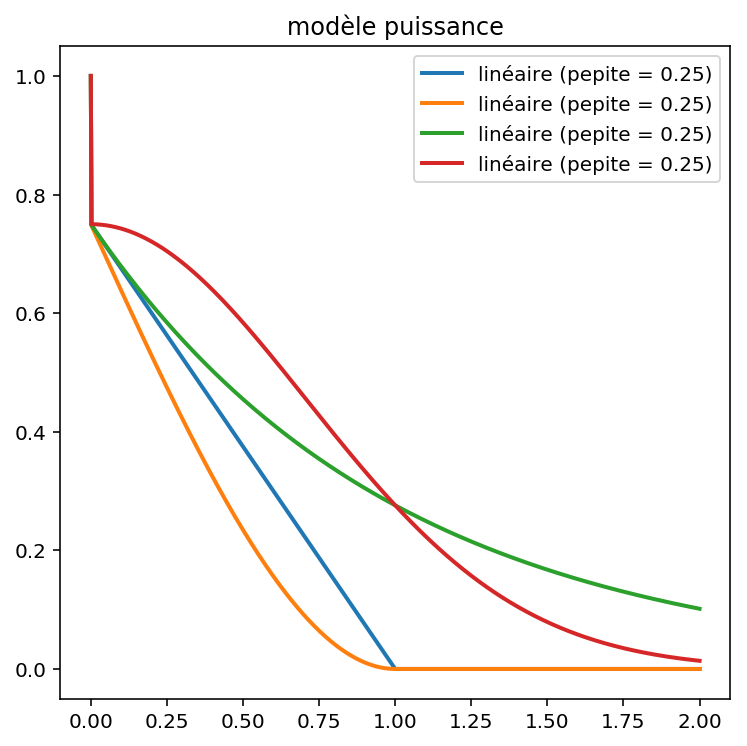

In [17]:
palier = 1
h = np.linspace(0,2*palier, 1000)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for pepite in [0.25]:
    ax.plot(h, g_puissance(h,1,palier,pepite=pepite),
    label =f'linéaire (pepite = {pepite})', linewidth=2)
    
    ax.plot(h, g_spherique(h,1,palier,pepite=pepite),
    label =f'linéaire (pepite = {pepite})', linewidth=2)
    
    ax.plot(h, g_exponentiel(h,1,palier,pepite=pepite),
    label =f'linéaire (pepite = {pepite})', linewidth=2)
    
    ax.plot(h, g_haussien(h,1,palier,pepite=pepite),
    label =f'linéaire (pepite = {pepite})', linewidth=2)
    

ax.legend()
ax.set_title("modèle puissance")
plt.show()

**Question**

> * Proposez une fonction `krigeage` sur le même modèle que la fonction `interp_Lagrange` en lui passant également en paramètre le modèle choisi.
> * Affichez les différentes interpolations obtenues pour différents modèles avec ou sans pépite. Vous testerez différentes valeurs pour le palier et vous proposerez un ou plusieurs modèles qui marchent correctement. 

In [15]:
def krigeage(X,Y,x, modele):
    
    M = modele['M']
    g = modele['g']
    
    N = X.size
    
    if Y.size != N:
        print("erreur")
        return
    
    V = np.zeros((N+M,N+M))

    for k in range(M):
        V[:N, N+k] = X**k
        V[N+k, :N] = X**k
    V[:N,:N] = g(abs(X[:, np.newaxis] - X[ np.newaxis, :]))

    sndmb = np.zeros((N+M,))
    sndmb[:N] = Y
    
    sol = np.linalg.solve(V,sndmb)
    alpha, beta = sol[:N], sol[N:]
    
    #evaluation du plonome en x P(x) = sum
    y = np.zeros(x.shape)
    print(x.shape)
    for a in beta[::-1]:
        y = y*x + a
    for i, alphai in enumerate(alpha):
        y += alphai*g(abs(x-X[i]))
    
    return y 
    
    

(301,)


Text(0.5, 1.0, 'Krigeage')

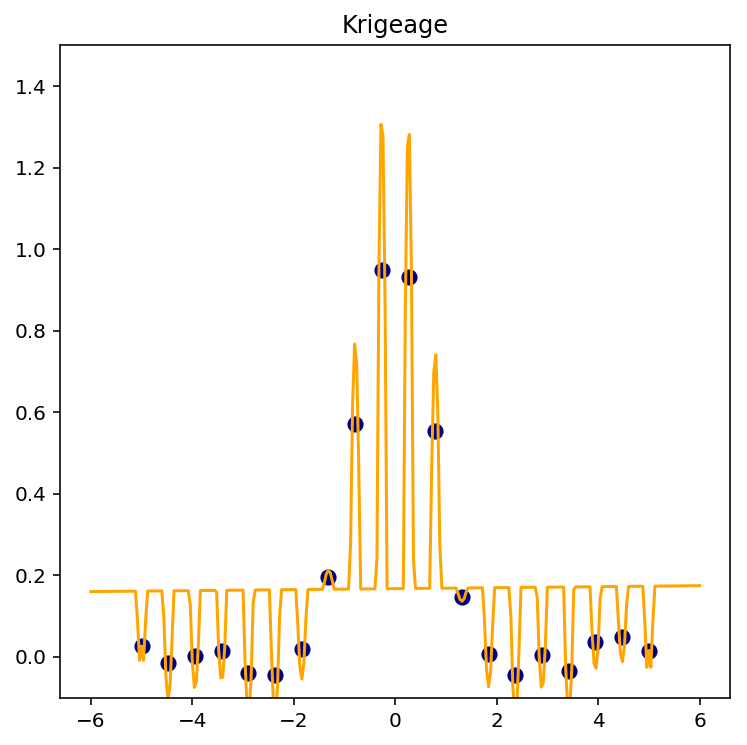

In [18]:
modele = {
    'M': 2,
    'g': lambda h: g_puissance(h,2,a=0.1,pepite=-.5)
}

n = 300 +1#6 * X + 1 avec X entier
x = np.linspace(a, b, n)
X,Y=getXY(20)


y = krigeage(X,Y,x,modele)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-0.1,1.5)
ax.scatter(X, Y, s=50, color='navy')
ax.plot(x, y, color='orange')
ax.set_title('Krigeage')

(601,)


Text(0.5, 1.0, 'Krigeage')

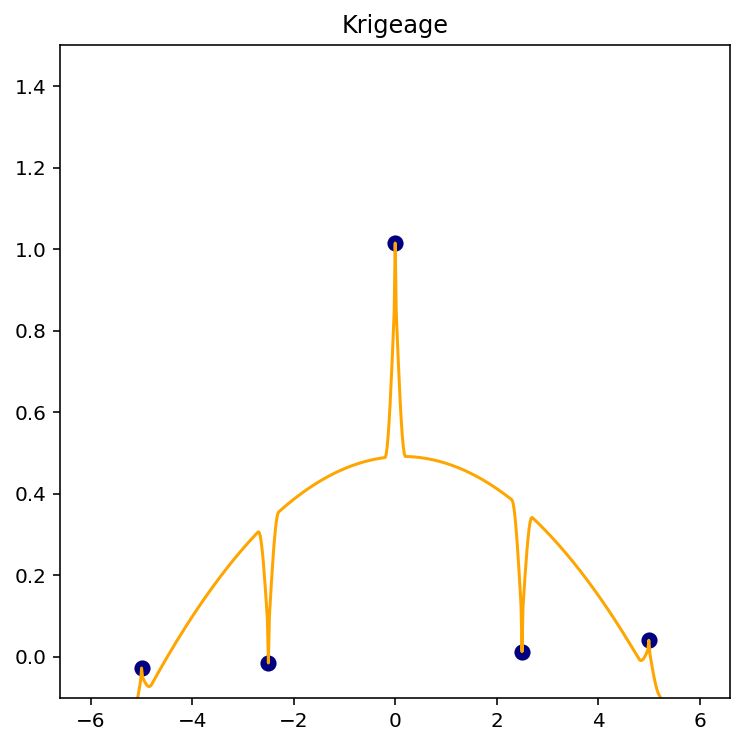

In [32]:
modele = {
    'M': 3,
    'g': lambda h: g_spherique(h,1,a=0.2,pepite=0.2)
}

n = 600 +1#6 * X + 1 avec X entier
x = np.linspace(a, b, n)
X,Y=getXY(5)
y = krigeage(X,Y,x,modele)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-0.1,1.5)
ax.scatter(X, Y, s=50, color='navy')
ax.plot(x, y, color='orange')
ax.set_title('Krigeage')